In [7]:
cd /private/home/ccaucheteux/hasson-syntaxe-vs-semantics/

/private/home/ccaucheteux/hasson-syntaxe-vs-semantics


In [8]:
from src import paths
import pandas as pd
import torch
import numpy as np
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
EXP_NAME = "0323_wiki_500_seeds_200_valid_mean"

In [293]:
df = pd.read_csv(paths.data / "wiki_bar_embeddings" / EXP_NAME / "embeddings_paths.csv")
df["is_file"] = df.bar_save_file.apply(lambda x: Path(x).is_file())
df = df.query("model_name=='gpt2'")[:2]

# Convergence analysis


In [308]:
from tqdm.notebook import tqdm

def get_bar_convergence_deltas(df, k1=200, k2=10):
    bar = {"euclidean": [], "cosine": []}
    for i, row in df.iterrows():
        blocks = torch.load(row.bar_save_file)
        for sent in tqdm(blocks):
            delta_cos = torch.cosine_similarity(sent[:, :k1].mean(1), 
                                                      sent[:, :k2].mean(1), dim=-1)
            bar["cosine"].append(delta_cos)
    return bar

In [312]:
bar2 = get_bar_convergence_deltas(df, k1=100)

In [313]:
Xbar2 = torch.cat(bar2["cosine"], dim=1)

from scipy.stats import sem
print(sem(1 - Xbar2[9]), 1-Xbar2[9].mean())

0.00016344973095601373 tensor(0.0136)


In [ ]:
Xbar = torch.cat(bar["cosine"], dim=1)

from scipy.stats import sem
print(sem(1 - Xbar[9]), 1-Xbar[9].mean())

In [311]:
Xbar = torch.cat(bar["cosine"], dim=1)

from scipy.stats import sem
print(sem(1 - Xbar[9]), 1-Xbar[9].mean())

0.00018385527155809211 tensor(0.0150)


In [ ]:
Xbar

In [326]:
res[9, 20]

tensor([1.0000, 0.9989, 0.9998,  ..., 0.9998, 0.9998, 1.0000])

In [329]:
x = res[9, 11]
print(sem(1 - x), 1-x.mean())


2.1075372274795118e-05 tensor(0.0011)


In [330]:
x = res[9, 100]
print(sem(1 - x), 1-x.mean())


7.359458940753676e-07 tensor(1.6510e-05)


In [319]:
from scipy.stats import sem
print(sem(1 - res[9, 11]), 1-res[9, 11].mean())

2.1075372274795118e-05 tensor(0.0011)


In [ ]:
res = torch.cat(bar["cosine"], dim=-1)
res.shape

In [224]:
from tqdm.notebook import tqdm

def get_bar_convergence_deltas(df):
    bar = {"euclidean": [], "cosine": []}
    for i, row in df.iterrows():
        blocks = torch.load(row.bar_save_file)
        for sent in tqdm(blocks):
            current = torch.zeros((sent.shape[0], *sent.shape[2:]))
            delta_euc = torch.zeros(sent.shape[:-1])
            delta_cos = torch.zeros(sent.shape[:-1])
            for k in range(sent.shape[1]):
                a = current / (k + 1) # xbar 
                b = (current + sent[:, k]) / (k + 2) # xbar with sent 
                delta_euc[:, k] = torch.norm(a - b, p=2, dim=-1) # diff
                delta_cos[:, k] = torch.cosine_similarity(a, b, dim=-1)
                current += sent[:, k]
            bar["euclidean"].append(delta_euc)
            bar["cosine"].append(delta_cos)
            print(current.shape)

    return bar

In [225]:
%%time
bar = get_bar_convergence_deltas(df)

torch.Size([13, 22, 768])
torch.Size([13, 21, 768])
torch.Size([13, 31, 768])
torch.Size([13, 28, 768])
torch.Size([13, 30, 768])
torch.Size([13, 10, 768])
torch.Size([13, 28, 768])
torch.Size([13, 22, 768])
torch.Size([13, 24, 768])
torch.Size([13, 12, 768])
torch.Size([13, 19, 768])
torch.Size([13, 13, 768])
torch.Size([13, 17, 768])
torch.Size([13, 16, 768])
torch.Size([13, 6, 768])
torch.Size([13, 11, 768])
torch.Size([13, 8, 768])
torch.Size([13, 8, 768])
torch.Size([13, 7, 768])
torch.Size([13, 12, 768])
torch.Size([13, 11, 768])
torch.Size([13, 14, 768])
torch.Size([13, 38, 768])
torch.Size([13, 7, 768])
torch.Size([13, 11, 768])
torch.Size([13, 21, 768])
torch.Size([13, 10, 768])
torch.Size([13, 23, 768])
torch.Size([13, 8, 768])
torch.Size([13, 16, 768])
torch.Size([13, 6, 768])
torch.Size([13, 13, 768])
torch.Size([13, 9, 768])
torch.Size([13, 10, 768])
torch.Size([13, 11, 768])
torch.Size([13, 7, 768])
torch.Size([13, 8, 768])
torch.Size([13, 18, 768])
torch.Size([13, 27, 76

torch.Size([13, 12, 768])
torch.Size([13, 19, 768])
torch.Size([13, 13, 768])
torch.Size([13, 15, 768])
torch.Size([13, 27, 768])
torch.Size([13, 27, 768])
torch.Size([13, 23, 768])
torch.Size([13, 23, 768])
torch.Size([13, 28, 768])
torch.Size([13, 20, 768])
torch.Size([13, 15, 768])
torch.Size([13, 15, 768])
torch.Size([13, 19, 768])
torch.Size([13, 15, 768])
torch.Size([13, 11, 768])
torch.Size([13, 17, 768])
torch.Size([13, 22, 768])
torch.Size([13, 22, 768])
torch.Size([13, 15, 768])
torch.Size([13, 10, 768])
torch.Size([13, 35, 768])
torch.Size([13, 12, 768])
torch.Size([13, 17, 768])
torch.Size([13, 13, 768])
torch.Size([13, 26, 768])
torch.Size([13, 20, 768])
torch.Size([13, 26, 768])
torch.Size([13, 37, 768])
torch.Size([13, 35, 768])
torch.Size([13, 26, 768])
torch.Size([13, 17, 768])
torch.Size([13, 39, 768])
torch.Size([13, 15, 768])
torch.Size([13, 27, 768])
torch.Size([13, 39, 768])
torch.Size([13, 16, 768])
torch.Size([13, 17, 768])
torch.Size([13, 19, 768])
torch.Size([

In [232]:
len(bar["cosine"])

124

In [279]:
res = torch.load("cosine_convergence.pth")

In [287]:
1 - res[9, 11].mean()

tensor(0.0011)

In [240]:
torch.save(res, "cosine_convergence.pth")

(1.0, 50.0)

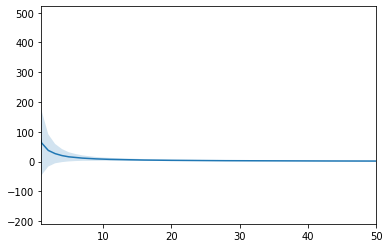

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem
res = torch.cat(bar["euclidean"], dim=-1)
LAYER = 9

means = res[LAYER].mean(-1).numpy()
sems = res[LAYER].std(-1).numpy() #sem(res[LAYER].numpy(), -1)
plt.plot(range(200), means) #yerr=sem)
plt.fill_between(range(200), means-sems, means+sems, alpha=.2) #yerr=sem)
plt.xlim(1, 50)

In [227]:
df = pd.read_csv(paths.data / "wiki_bar_embeddings" / EXP_NAME / "embeddings_paths.csv")
df["is_file"] = df.bar_save_file.apply(lambda x: Path(x).is_file())
df = df.query("model_name=='gpt2'")[:10]

# Probing analyses

## Functions

In [11]:
from sklearn.linear_model import RidgeCV, RidgeClassifierCV, LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import balanced_accuracy_score, make_scorer, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

from collections import defaultdict
from sklearn.preprocessing import OneHotEncoder
from wordfreq import zipf_frequency


def get_bar_emb(df, n, concat=True, feat="bar_save_file"):
    bar = []
    i = 0
    for i, row in df.iterrows():
        tmp = torch.load(row[feat])
        for sent in tqdm(tmp):
            i += 1
            bar.append(sent[:, :n].mean(1))
    if concat:
        bar = torch.cat(bar, dim=1)
    return bar


def get_true_emb(df, concat=False):
    true = get_bar_emb(df, 1, feat="base_save_file", concat=concat)
    return true


def extract_syn_features(toks, checks=True, binder_taggers=None):
    sent = " ".join(toks)
    doc = nlp(sent)

    if checks:
        if len(doc) != len(toks):
            return None

        if len(list(doc.sents)) > 1:
            return None

    # pos
    pos = np.array([w.pos_ for w in doc])[:, None]

    # tag
    tag = np.array([w.tag_ for w in doc])[:, None]

    # wordemb
    vectors = np.stack([w.vector for w in doc])

    # freq
    freq = np.array([zipf_frequency(w.text, "en") for w in doc])

    # depth
    matrix = get_distance_matrix(doc)
    root = list(doc.sents)[0].root.i
    depth = matrix[:, root][:, None]
    
    if binder_taggers is not None:
        sem_feats = {}
        for k, tagger in binder_taggers.items():
            sem_feats[k] = tagger.predict(vectors)

    return dict(pos=pos, tag=tag, wordemb=vectors, depth=depth, freq=freq, **sem_feats)


def get_probe_features(df, binder_taggers=None):
    probe = defaultdict(lambda: [])
    valid = []
    idx = 0
    for i, row in df.iterrows():
        blocks = np.load(row.tok_save_file, allow_pickle=True).item()
        blocks = blocks["base"]
        # toks is a list of word for one sentence
        for j, toks in enumerate(blocks):
            toks = np.array(toks[0])
            feats = extract_syn_features(toks, binder_taggers=binder_taggers)
            if feats is not None:
                for k, f in feats.items():
                    probe[k].append(f)
                valid.append(idx)
            idx += 1
    return probe, valid


def filter_valid(X, valid, layer):
    X = [t[layer] for i, t in enumerate(X) if i in valid]
    X = np.concatenate(X)
    return X


def get_word_emb_ro(targets):
    # Add word emb regressed out
    pos = OneHotEncoder(sparse=False).fit_transform(targets["pos"])
    tag = OneHotEncoder(sparse=False).fit_transform(targets["tag"])
    Y = targets["wordemb"].copy()
    X = np.concatenate([pos, tag], axis=-1)
    pred = cross_val_predict(reg_model, X, Y, cv=cv)
    return Y - pred


def get_binder_taggers(
        file="data/binder_semantic_categories/binder_WordSet1_Ratings.csv",
        return_score=False):
    binder = pd.read_csv(file)
    X = np.stack([nlp(w)[0].vector for w in binder.Word])

    taggers = {}
    scores = {}
    for key, tag in zip(['Type', 'Super Category', 'Category', "Kmeans28 Category"],
                        ["type", "super_cat", "cat", "28cat"]):
        Y = LabelEncoder().fit_transform(binder[key])
        model = make_pipeline(StandardScaler(), RidgeClassifierCV(np.logspace(-3, 5, 20)))
        #model = make_pipeline(StandardScaler(), LogisticRegression())
        if return_score:
            scorer = make_scorer(balanced_accuracy_score, adjusted=True)
            scores[f"binder_{tag}"] = cross_val_score(model,
                                                      X,
                                                      Y,
                                                      scoring=scorer,
                                                      cv=10)
        model.fit(X, Y)
        taggers[f"binder_{tag}"] = model
        
    return taggers, scores


def get_binder_embedding(file="data/binder_semantic_categories/binder_WordSet1_Ratings.csv",
        return_score=False):
    binder = pd.read_csv(file)
    X = np.stack([nlp(w)[0].vector for w in binder.Word])
    cat = ['Type', 'Super Category', 'Category', "Kmeans28 Category"]
    continuous = ['WC', 'N', 'Mean R', 'Vision', 'Bright', 'Dark', 'Color',
       'Pattern', 'Large', 'Small', 'Motion', 'Biomotion', 'Fast', 'Slow',
       'Shape', 'Complexity', 'Face', 'Body', 'Touch', 'Temperature',
       'Texture', 'Weight', 'Pain', 'Audition', 'Loud', 'Low', 'High', 'Sound',
       'Music', 'Speech', 'Taste', 'Smell', 'Head', 'UpperLimb', 'LowerLimb',
       'Practice', 'Landmark', 'Path', 'Scene', 'Near', 'Toward', 'Away',
       'Number', 'Time', 'Duration', 'Long', 'Short', 'Caused',
       'Consequential', 'Social', 'Human', 'Communication', 'Self',
       'Cognition', 'Benefit', 'Harm', 'Pleasant', 'Unpleasant', 'Happy',
       'Sad', 'Angry', 'Disgusted', 'Fearful', 'Surprised', 'Drive', 'Needs',
       'Attention', 'Arousal', 'LEN', 'FREQ', 'L10 FREQ',
       'Orth', 'Orth_F', 'N1_F', 'N2_F', 'N3_F', 'IMG',] 
    Y_cat = OneHotEncoder(sparse=False).fit_transform(binder[cat])
    Y_con = binder[continuous].select_dtypes([float, int]).fillna(0)
    Y = np.concatenate([Y_cat, Y_con], axis=1)
    model = make_pipeline(StandardScaler(), RidgeCV(np.logspace(-3, 5, 20)))
    score = None
    if return_score:
        score = cross_val_score(model, X, Y,  cv=10)
    model.fit(X, Y)
    return model, score
    

def probe(X,
          Xbar,
          targets,
          selected,
          reg_model=RidgeCV(np.logspace(-3, 6, 10)),
          class_model=RidgeClassifierCV(np.logspace(-3, 6, 10)),
          cat_scorer=make_scorer(balanced_accuracy_score, adjusted=True),
          cv=5):
    r = {}
    for key in selected:
        Y = targets[key].copy()
        r[key] = {}
        print(key)
        assert len(Y) == len(X)
        print(len(X))
        if key in ["pos", "tag"] or ("binder" in key): # categorical features
            Y = LabelEncoder().fit_transform(Y)
            model = make_pipeline(StandardScaler(), class_model)
            metric = cat_scorer
        else: # continuous features
            model = make_pipeline(StandardScaler(), reg_model)
            metric = "r2"
        #if (key == "freq") or ("noun" in key): # only nouns features
        if "noun" in key: # only nouns features
            print("nouns")
            idx = np.where(targets["pos"] == "NOUN")[0]
        else:
            idx = np.arange(len(X))

            
        for feat, label in zip([X, Xbar, X-Xbar],
                               ["init", "syn", "sem"],
                               ):
            r[key][label] = cross_val_score(model,
                                             feat[idx],
                                             Y[idx],
                                             cv=cv,
                                             scoring=metric)  # base
    return r

In [12]:
import networkx as nx

def get_ranks(x, *args, **kwargs):
    """
    Replaces values by rank
    """
    idx = np.argsort(x, *args, **kwargs)
    ranks = np.empty_like(idx)
    ranks[idx] = np.arange(len(x))
    return ranks


def correlate(X, Y, spearman=True):
    """
    Fast pearsonr (or spearmanr) correlation across first dimension
    """
    if spearman:
        X = get_ranks(X, axis=0)
        Y = get_ranks(Y, axis=0)

    if X.ndim == 1:
        X = X[:, None]
    if Y.ndim == 1:
        Y = Y[:, None]
    out = np.zeros(max([Y.shape[1], X.shape[1]]))
    X = X - X.mean(0)
    Y = Y - Y.mean(0)

    SX2 = (X ** 2).sum(0) ** 0.5
    SY2 = (Y ** 2).sum(0) ** 0.5
    SXY = (X * Y).sum(0)
    # alid = (SX2 != 0) & (SY2 != 0)
    # out[valid] = SXY[valid] / (SX2[valid] * SY2[valid])
    out = SXY / (SX2 * SY2)
    return out


def get_distance_matrix(doc):
    """
    Return distance matrix of
    """
    if len(doc) == 0:
        return np.zeros((0, 0))

    edges = []
    for token in doc:
        for child in token.children:
            edges.append((token.i, child.i))
    graph = nx.Graph(edges)

    distances = nx.all_pairs_shortest_path_length(graph)

    matrix = np.zeros((len(doc), len(doc)), dtype=int)
    for i, d in distances:
        if not len(d):
            continue
        matrix[i, list(d.keys())] = list(d.values())
    #upper_tri = np.triu_indices(len(doc))
    return matrix #[upper_tri]


def format_text(text):
    text = text.replace('\n', ' ')
    text = text.replace(' -- ', '. ')
    text = text.replace(' – ', ', ')
    text = text.replace('–', '-')
    text = text.replace(' "', '. ')
    text = text.replace(' "', '. ')
    text = text.replace('" ', '. ')
    text = text.replace('". ', '. ')
    text = text.replace('." ', '. ')
    text = text.replace('?. ', '? ')
    text = text.replace(',. ', ', ')
    text = text.replace('...', '. ')
    text = text.replace('.. ', '. ')
    text = text.replace(':', '. ')
    text = text.replace('…', '. ')
    text = text.replace('-', ' ')
    text = text.replace('  ', ' ')
    text = text.lower()
    return text


## Run

In [13]:
import spacy
nlp = spacy.load("en_core_web_lg")
#nlp = spacy.load("en_core_web_sm")

In [14]:
true = get_true_emb(df, concat=False)
bar = get_bar_emb(df, 10, concat=False)

In [15]:
binder_taggers, scores = get_binder_taggers(return_score=True)
binder_taggers["sem_emb"], score = get_binder_embedding(return_score=True)
feats, valid = get_probe_features(df, binder_taggers=binder_taggers)

/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true

In [16]:
from sklearn.metrics import accuracy_score
LAYER = 9
cv = 19

# Inputs
X = filter_valid(true, valid, LAYER)
Xbar = filter_valid(bar, valid, LAYER)
targets = {k:np.concatenate(v) for k, v in feats.items()}
    
#accuracy_score
selected = ["freq", "pos", "tag", "depth", "wordemb", "sem_emb", 'binder_type', 'binder_super_cat', 'binder_cat', "binder_28cat"]
for key in selected:
    targets[f"noun_{key}"] = targets[key].copy()
selected += [f"noun_{key}" for key in selected]

#selected = ['binder_type', 'binder_super_cat', 'binder_cat', "binder_28cat"]
r = probe(X, Xbar, targets, selected, cv=cv) #cat_scorer="accuracy")

freq
2316
pos
2316


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less th

tag
2316


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/pr

depth
2316
wordemb
2316
sem_emb
2316
binder_type
2316
binder_super_cat
2316


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)


binder_cat
2316


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)


binder_28cat
2316


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/private/home/ccaucheteux/.con

noun_freq
2316
nouns
noun_pos
2316
nouns


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1602, in fit
    estimator.fit(X, y, sample_weight=sample_weight)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1470, in fit


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1602, in fit
    estimator.fit(X, y, sample_weight=sample_weight)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1470, in fit


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1602, in fit
    estimator.fit(X, y, sample_weight=sample_weight)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1470, in fit


noun_tag
2316
nouns


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1602, in fit
    estimator.fit(X, y, sample_weight=sample_weight)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1470, in fit


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1602, in fit
    estimator.fit(X, y, sample_weight=sample_weight)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1470, in fit


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1602, in fit
    estimator.fit(X, y, sample_weight=sample_weight)
  File "/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py", line 1470, in fit


noun_depth
2316
nouns
noun_wordemb
2316
nouns
noun_sem_emb
2316
nouns
noun_binder_type
2316
nouns


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)


noun_binder_super_cat
2316
nouns


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)


noun_binder_cat
2316
nouns


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=19.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.con

noun_binder_28cat
2316
nouns


/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/metrics/_cl

In [59]:
labels = {
    "tag": "POS",
    "depth": "Tree depth",
    "freq": "Word freq",
    "wordemb": "Spacy embedding",
    "pos": "Simple POS",
    'binder_type':"Binder (Type)",
    'binder_super_cat':"Binder (Super Cat)", 
    'binder_cat':"Binder (Cat)",
    "binder_28cat": "Binder (28)",
    "binder_emb":"Binder (wordmb)",
    "sem_emb": "Binder embedding"
}
for key in selected:
    if key not in labels:
        if "noun_" in key and key.split("noun_")[1] in labels:
            labels[key] = labels[key.split("noun_")[1]] + "\n(NOUNS only)"
        else:
            labels[key] = key

color = {
    "init": "lightgrey",
    "syn": "red",
    "sem": "royalblue",
    "rel_sem": "royalblue",
    "rel_syn": "red",
    "rel_init": "lightgrey",

}

## Plots

### All

Text(0.5, 1.0, 'ALL')

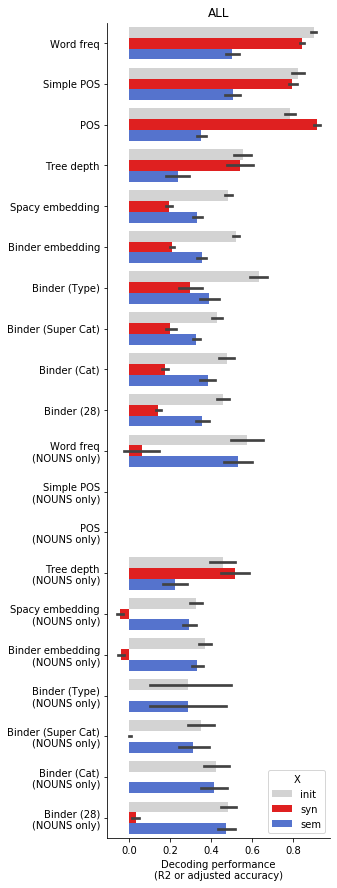

In [18]:
reform = {(ok, ik): v for ok, idict in r.items() for ik, v in idict.items()}
r_df = pd.DataFrame(reform)
r_df = pd.melt(r_df, var_name = ["Y", "X"], value_name="perf")
r_df
X_select = ["init", "syn", "sem"]
Y_select = selected #["tag", "depth", "freq"]

plt.figure(figsize=(4, 15))
ax = plt.subplot()
sns.barplot(y="Y", 
            x="perf", 
            hue="X", 
             orient="h",
            order = Y_select,
            palette=color,
            data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
plt.xlabel("Decoding performance\n(R2 or adjusted accuracy)")
plt.ylabel("")
ax.set_yticklabels([labels[i] for i in Y_select])
plt.title("ALL")

### Selected

**With init**

/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


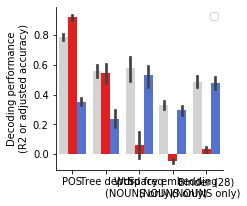

In [22]:
reform = {(ok, ik): v for ok, idict in r.items() for ik, v in idict.items()}
r_df = pd.DataFrame(reform)
r_df = pd.melt(r_df, var_name = ["Y", "X"], value_name="perf")
r_df

X_select = ["init", "syn", "sem"]
Y_select = ["tag", "depth", "noun_freq", "noun_wordemb", "noun_binder_28cat"]


plt.figure(figsize=(3,3))
ax = plt.subplot()
sns.barplot("Y", 
            "perf", 
            hue="X", 
            order = Y_select,
            palette=color,
            data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
plt.ylabel("Decoding performance\n(R2 or adjusted accuracy)")
plt.xlabel("")
ax.set_xticklabels([labels[i] for i in Y_select])
plt.legend(())

**With init renormalization**

In [69]:
tmp = {k:v for k,v in r.items()}
for k, v in tmp.items():
    for lab in ["syn", "sem", "init"]:
        tmp[k][f"rel_{lab}"] =  tmp[k][lab] / tmp[k]["init"] * 100

/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [70]:
reform = {(ok, ik): v for ok, idict in tmp.items() for ik, v in idict.items()}
r_df = pd.DataFrame(reform)
r_df = pd.melt(r_df, var_name = ["Y", "X"], value_name="perf")
r_df

,Y,X,perf
0,freq,init,0.941172
1,freq,init,0.926269
2,freq,init,0.929005
3,freq,init,0.899243
4,freq,init,0.858365
...,...,...,...
2275,noun_binder_28cat,rel_init,100.000000
2276,noun_binder_28cat,rel_init,100.000000
2277,noun_binder_28cat,rel_init,100.000000
2278,noun_binder_28cat,rel_init,100.000000


In [583]:
labels = {
    "tag": "POS",
    "depth": "Tree\ndepth",
    "freq": "Word\nfreq",
    "wordemb": "Word\nvector",
    "pos": "Simple POS",
    'binder_type':"Binder (Type)",
    'binder_super_cat':"Word\ncat", 
    'binder_cat':"Word\ncat",
    "binder_28cat": "Binder (28)",
    "binder_emb":"Binder (wordmb)",
    "sem_emb": "Binder embedding",
    
    # Ylabels
    "init": "GPT2 ($X$)",
    "syn": "Syntactic GPT2 ($\overline{X}$)",
    "sem": "Semantic ($X-\overline{X}$)",
    "rel_init": "$X$",
    "rel_syn": "$\overline{X}$",
    "rel_sem": "$X-\overline{X}$",
}
for key in selected:
    if key not in labels:
        if "noun_" in key and key.split("noun_")[1] in labels:
            #labels[key] = labels[key.split("noun_")[1]] + "*"
            labels[key] = labels[key.split("noun_")[1]].replace("Word", "Noun")
        else:
            labels[key] = key

color = {
    "init": "lightgrey",
    "syn": "red",
    "sem": "royalblue",
    "rel_sem": "royalblue",
    "rel_syn": "red",
    "rel_init": "lightgrey",
}

/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


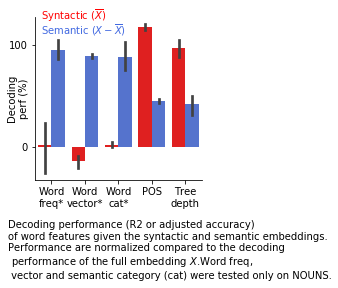

In [169]:
X_select = ["rel_syn", "rel_sem"]
Y_select = ["noun_freq", "noun_wordemb", "noun_binder_super_cat", "tag", "depth", ]


fig = plt.figure(figsize=(3,3), facecolor="w")
ax = plt.subplot()
sns.barplot("Y", 
            "perf", 
            hue="X", 
            order = Y_select,
            palette=color,
            data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
#plt.ylabel("Relative decoding performance\n(R2 or adjusted accuracy, %)")
plt.ylabel("Decoding\nperf (%)", labelpad=-20)
plt.xlabel("")
ax.set_xticklabels([labels[i] for i in Y_select])
ax.get_legend().remove()
ax.set_yticks([0, 100])


for lab, x, y in zip(["syn", "sem"], [-.3, -.3], [125, 110, ]):
    plt.text(x, y, labels[lab], color=color[lab])

    
caption = "Decoding performance (R2 or adjusted accuracy)\n\
of word features given the syntactic and semantic embeddings.\n\
Performance are normalized compared to the decoding \n performance of the full embedding $X$.\
Word freq, \n vector and semantic category (cat) were tested only on NOUNS."

fig.text(0, -.06, caption, ha='center', verticalalignment="top", horizontalalignment="left") #, verticalalignment="top")
plt.show()
#for k, tag in enumerate(Y_select):
#    plt.text(k, 130, labels[tag], horizontalalignment="center", verticalalignment="top")

In [586]:
labels = {
    "tag": "POS*",
    "depth": "Tree\ndepth",
    "freq": "Word\nfreq",
    "wordemb": "Word\nvector",
    "pos": "Simple POS",
    'binder_type':"Binder (Type)",
    'binder_super_cat':"Word\ncat*", 
    'binder_cat':"Word\ncat*",
    "binder_28cat": "Binder (28)",
    "binder_emb":"Binder (wordmb)",
    "sem_emb": "Binder embedding",
    
    # Ylabels
    "init": "GPT2 ($X$)",
    "syn": "Syntactic GPT2 ($\overline{X}$)",
    "sem": "Semantic ($X-\overline{X}$)",
    "rel_init": "$X$",
    "rel_syn": "$\overline{X}$",
    "rel_sem": "$X-\overline{X}$",
}
for key in selected:
    if key not in labels:
        if "noun_" in key and key.split("noun_")[1] in labels:
            #labels[key] = labels[key.split("noun_")[1]] + "*"
            labels[key] = labels[key.split("noun_")[1]].replace("Word", "Noun")
        else:
            labels[key] = key

color = {
    "init": "lightgrey",
    "syn": "red",
    "sem": "royalblue",
    "rel_sem": "royalblue",
    "rel_syn": "red",
    "rel_init": "grey",
}

In [587]:
# TODO : add bracket 

In [338]:
%config InlineBackend.figure_format = 'retina'

### Base with seaborn

/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


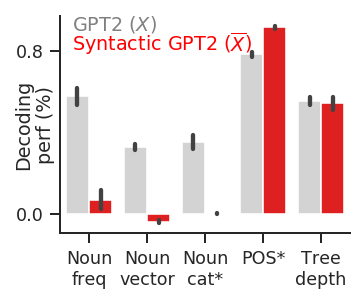

In [588]:
X_select = ["init", "syn"]
Y_select = ["noun_freq", "noun_wordemb", "noun_binder_super_cat", "tag", "depth", ]


fig = plt.figure(1, figsize=(2.6,2), facecolor="w")
ax = plt.subplot()


sub = r_df.query("X in @X_select and Y in @Y_select").groupby
means = r_df
sns.barplot("Y", 
            "perf", 
            hue="X", 
            order = Y_select,
            palette=color,
            ci=68,
            data=r_df.query("X in @X_select and Y in @Y_select"))


sns.despine()
#plt.ylabel("Relative decoding performance\n(R2 or adjusted accuracy, %)")
plt.ylabel("Decoding\nperf (%)", labelpad=-20)
plt.xlabel("")
ax.set_xticklabels([labels[i] for i in Y_select])
ax.get_legend().remove()
ax.set_yticks([0, 0.8])


for lab, x, y, c in zip(["init", "syn"], [-.3, -.3], [.9, .8, ], ["grey", "red"]):
    plt.text(x, y, labels[lab], color=c, horizontalalignment="left")

    
caption = "Decoding performance (R2 or adjusted accuracy)\n\
of word features for the ninth layer of GPT2 ($X$)\nand its syntactic component ($\overline{X}$),\
on 120 sentences of wikipedia (~2K words).\n\
Noun frequencies, embedding vector and semantic category (cat)\nwere tested on NOUNS only.\n\
* Categorical features"

props = {'connectionstyle': 'bar', 'arrowstyle':'-',
         'shrinkA':1,'shrinkB':1,'linewidth':2}

### Matplotlib horizontal

Text(0.2, 4.5, 'Syntactic')

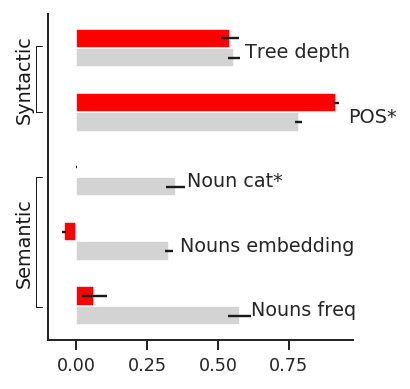

In [590]:
from matplotlib.gridspec import GridSpec
X_select = ["init", "syn"]
Y_select = ["noun_freq", "noun_wordemb", "noun_binder_super_cat", "tag", "depth", ]


fig = plt.figure(1, figsize=(3,3), facecolor="w")
G = GridSpec(nrows=1, ncols=2, width_ratios=[.1, 1], wspace=0)
ax = plt.subplot(G[0, 1])
sub = r_df.query("X in @X_select and Y in @Y_select")
k = len(Y_select)
for i, (X, c) in enumerate(zip(X_select, ["lightgrey", "red"])):
    #sub = sub.sort_values("Y")
    group = sub.query("X==@X").groupby("Y")
    means = group["perf"].agg("mean").values
    sems = group["perf"].agg("sem").values
    names = group["Y"].agg("first")
    idx = np.array([list(names).index(i) for i in Y_select])
    x = (np.arange(k) + i*.3)
    plt.barh(x, 
             means[idx],
             xerr=sems[idx], 
             color=c, 
             height=.3)
    sns.despine()
    ax.set_yticks(())
    ax.set_yticklabels(())
    
group = sub.groupby(["X", "Y"])["perf"].agg("mean").reset_index().groupby("Y")

means = group["perf"].agg("mean").values
sems = group["perf"].agg("sem").values
names = group["Y"].agg("first").values
idx = np.array([list(names).index(i) for i in Y_select])
for i, lab in enumerate(names[idx]):
    plt.text(means[idx][i] + sems[idx][i] + .04, i, s=new_labels[lab])
    
ax = plt.subplot(G[0, 0])
ax.axis("off")
plt.ylim(.5, len(Y_select)+.5)
plt.xlim(0, 1)
opts = dict( ha='center', va='center', color="k", rotation=90)
br_opts = dict(lw=.5, c="k")
# Semantic
x1, x2, y, h = 1, 3, .8, -.2
plt.plot([y, y+h, y+h, y], [x1, x1, x2, x2], **br_opts)
plt.text(.2, (x1+x2)*.5, "Semantic", **opts)

# Syntactic
x1, x2 = 4, 5
plt.plot([y, y+h, y+h, y], [x1, x1, x2, x2], **br_opts)
plt.text(.2, (x1+x2)*.5, "Syntactic", **opts)

### Matplotlib vertical

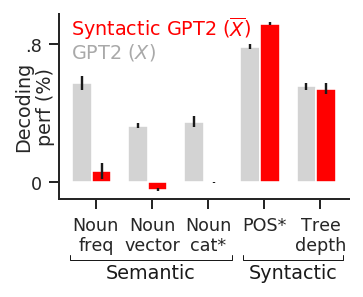

In [591]:
from matplotlib.gridspec import GridSpec
X_select = ["init", "syn"]
Y_select = ["noun_freq", "noun_wordemb", "noun_binder_super_cat", "tag", "depth", ]


fig = plt.figure(1, figsize=(2.6,2.3), facecolor="w")
G = GridSpec(nrows=2, ncols=1, height_ratios=[1, .1], hspace=.45)
ax = plt.subplot(G[0, 0])
sub = r_df.query("X in @X_select and Y in @Y_select")
k = len(Y_select)
#ax = plt.subplot()
for i, (X, c) in enumerate(zip(X_select, ["lightgrey", "red"])):
    #sub = sub.sort_values("Y")
    group = sub.query("X==@X").groupby("Y")
    means = group["perf"].agg("mean").values
    sems = group["perf"].agg("sem").values
    names = group["Y"].agg("first")
    idx = np.array([list(names).index(i) for i in Y_select])
    plt.bar(np.arange(k) + i*.35, means[idx], yerr=sems[idx], color=c, width=.35)
    #ax.set_xticklabels(Y_select)
    sns.despine()
    ax.set_xticks(np.arange(.25, .25+len(Y_select)))
    ax.set_xticklabels([labels[i] for i in Y_select])
 
for lab, x, y, c in zip(["init", "syn"], [-.2, -.2], [.72, .85], ["darkgrey", "red"]):
    plt.text(x=x, 
             y=y, 
             s=labels[lab], 
             color=c, 
             horizontalalignment="left")
ax.set_yticks((0, .8))
ax.set_yticklabels(("0", ".8"))
plt.ylabel("Decoding\nperf (%)", labelpad=-15)


ax = plt.subplot(G[1, 0])
ax.axis("off")
plt.xlim(0, .2+len(Y_select))
plt.ylim(0, 1)
x1, x2, y, h = .2, 3.1, .5, -.3
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=.5, c="k")
plt.text((x1+x2)*.5, y+h-.7, "Semantic", ha='center', va='center', color="k")


x1, x2 = 3.3, 5.1
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=.5, c="k")
plt.text((x1+x2)*.5, y+h-.7, "Syntactic", ha='center', va='center', color="k")

plt.show()

In [ ]:
sns.barplot(y="Y", 
            x="perf", 
            hue="X", 
            order = Y_select,
            palette=color,
            orient="h",
            ci=68,
            data=
sns.despine()
#plt.ylabel("Relative decoding performance\n(R2 or adjusted accuracy, %)")
plt.xlabel("Decoding perf (%)", labelpad=-10)
plt.ylabel("")
ax.set_yticklabels([labels[i] for i in Y_select])
ax.get_legend().remove()
ax.set_xticks([0, 0.8])


for lab, x, y, c in zip(["init", "syn"], [.7, 2], [.7, 3], ["darkgrey", "r"]):
    plt.text(x=x, y=y, 
             s=labels[lab], 
             color=c, 
             horizontalalignment="left")

    
caption = "Decoding performance (R2 or adjusted accuracy)\n\
of word features for the ninth layer of GPT2 ($X$)\nand its syntactic component ($\overline{X}$),\
on 120 sentences of wikipedia (~2K words).\n\
Noun frequencies, embedding vector and semantic category (cat)\nwere tested on NOUNS only.\n\
* Categorical features"
plt.show()

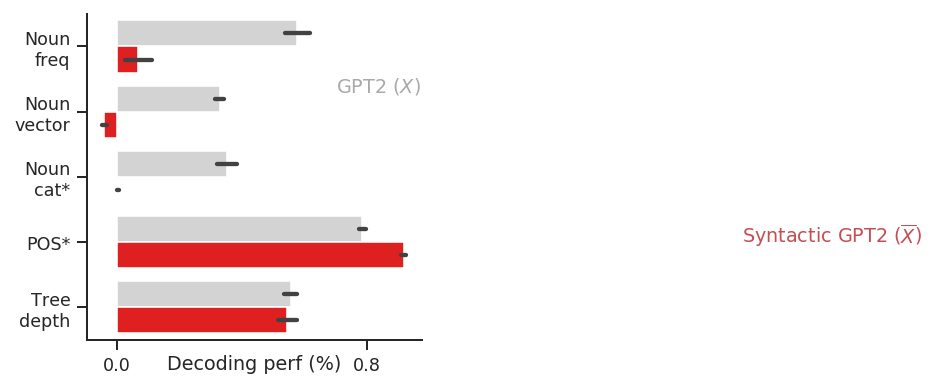

In [341]:
X_select = ["init", "syn"]
Y_select = ["noun_freq", "noun_wordemb", "noun_binder_super_cat", "tag", "depth", ]


fig = plt.figure(1, figsize=(3,3), facecolor="w")
ax = plt.subplot()
sns.barplot(y="Y", 
            x="perf", 
            hue="X", 
            order = Y_select,
            palette=color,
            orient="h",
            ci=68,
            data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
#plt.ylabel("Relative decoding performance\n(R2 or adjusted accuracy, %)")
plt.xlabel("Decoding perf (%)", labelpad=-10)
plt.ylabel("")
ax.set_yticklabels([labels[i] for i in Y_select])
ax.get_legend().remove()
ax.set_xticks([0, 0.8])


for lab, x, y, c in zip(["init", "syn"], [.7, 2], [.7, 3], ["darkgrey", "r"]):
    plt.text(x=x, y=y, 
             s=labels[lab], 
             color=c, 
             horizontalalignment="left")

    
caption = "Decoding performance (R2 or adjusted accuracy)\n\
of word features for the ninth layer of GPT2 ($X$)\nand its syntactic component ($\overline{X}$),\
on 120 sentences of wikipedia (~2K words).\n\
Noun frequencies, embedding vector and semantic category (cat)\nwere tested on NOUNS only.\n\
* Categorical features"
plt.show()

NameError: name 'ax2' is not defined

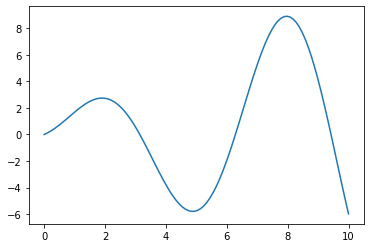

In [233]:
from matplotlib import pyplot, lines
import numpy

x = numpy.linspace(0,10,100)
y = numpy.sin(x)*(1+x)

fig = pyplot.figure()
ax = pyplot.subplot(111)
ax.plot(x,y,label='a')

# new clear axis overlay with 0-1 limits
#ax2 = pyplot.axes([0,0,1,1], axisbg=(1,1,1,0))

x,y = numpy.array([[0.05, 0.1, 0.9], [0.05, 0.5, 0.9]])
line = lines.Line2D(x, y, lw=5., color='r', alpha=0.4)
ax2.add_line(line)

pyplot.show()

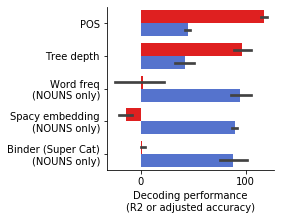

In [80]:
X_select = ["rel_syn", "rel_sem"]
Y_select = ["tag", "depth", "noun_freq", "noun_wordemb", "noun_binder_super_cat"]

plt.figure(figsize=(3,3))
ax = plt.subplot()
sns.barplot(y="Y", 
            x="perf", 
            hue="X", 
            order = Y_select,
            palette=color,
            orient="h",
            data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
plt.xlabel("Decoding performance\n(R2 or adjusted accuracy)")
plt.ylabel("")
ax.set_yticklabels([labels[i] for i in Y_select])
ax.get_legend().remove()
ax.set_xticks([0, 100])

#for k, tag in enumerate(Y_select):
#    plt.text(k, 130, labels[tag], horizontalalignment="center", verticalalignment="top")

Text(0.5, 1.0, 'Layer 9')

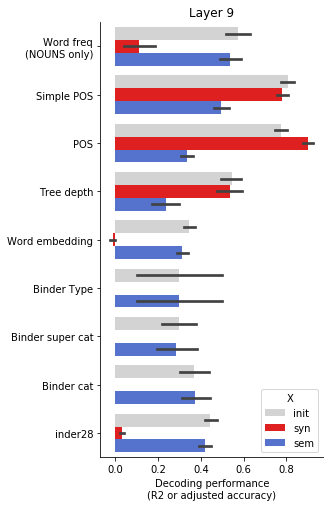

In [15]:
reform = {(ok, ik): v for ok, idict in r.items() for ik, v in idict.items()}
r_df = pd.DataFrame(reform)
r_df = pd.melt(r_df, var_name = ["Y", "X"], value_name="perf")
r_df
X_select = ["init", "syn", "sem"]
Y_select = selected #["tag", "depth", "freq"]

plt.figure(figsize=(4, 8))
ax = plt.subplot()
sns.barplot(y="Y", 
            x="perf", 
            hue="X", 
             orient="h",
            order = Y_select,
            palette=color,
            data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
plt.xlabel("Decoding performance\n(R2 or adjusted accuracy)")
plt.ylabel("")
ax.set_yticklabels([labels[i] for i in Y_select])
plt.title("Layer 9")

Text(0.5, 1.0, 'Layer 9')

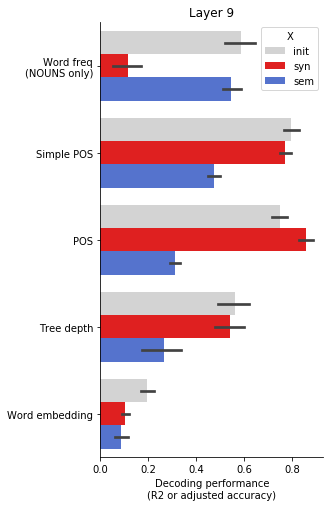

In [286]:
reform = {(ok, ik): v for ok, idict in r.items() for ik, v in idict.items()}
r_df = pd.DataFrame(reform)
r_df = pd.melt(r_df, var_name = ["Y", "X"], value_name="perf")
r_df
X_select = ["init", "syn", "sem"]
Y_select = selected #["tag", "depth", "freq"]

plt.figure(figsize=(4, 8))
ax = plt.subplot()
sns.barplot(y="Y", 
            x="perf", 
            hue="X", 
             orient="h",
            order = Y_select,
            palette=color,
            data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
plt.xlabel("Decoding performance\n(R2 or adjusted accuracy)")
plt.ylabel("")
ax.set_yticklabels([labels[i] for i in Y_select])
plt.title("Layer 9")

Text(0.5, 1.0, 'Layer 9')

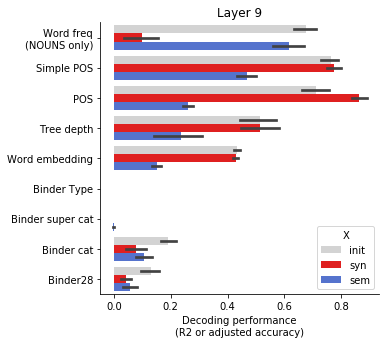

In [259]:
reform = {(ok, ik): v for ok, idict in r.items() for ik, v in idict.items()}
r_df = pd.DataFrame(reform)
r_df = pd.melt(r_df, var_name = ["Y", "X"], value_name="perf")
r_df
X_select = ["init", "syn", "sem"]
Y_select = selected

plt.figure(figsize=(5, 5))
ax = plt.subplot()
sns.barplot(y="Y", 
            x="perf", 
            hue="X", 
             orient="h",
            order = Y_select,
            palette=color,
            data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
plt.xlabel("Decoding performance\n(R2 or adjusted accuracy)")
plt.ylabel("")
ax.set_yticklabels([labels[i] for i in Y_select])
plt.title("Layer 9")

/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


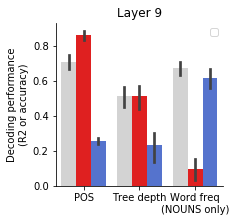

In [269]:
reform = {(ok, ik): v for ok, idict in r.items() for ik, v in idict.items()}
r_df = pd.DataFrame(reform)
r_df = pd.melt(r_df, var_name = ["Y", "X"], value_name="perf")
r_df

X_select = ["init", "syn", "sem"]
Y_select = ["tag", "depth", "freq"]


plt.figure(figsize=(3,3))
ax = plt.subplot()
sns.barplot("Y", 
            "perf", 
            hue="X", 
            order = Y_select,
            palette=color,
            data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
plt.ylabel("Decoding performance\n(R2 or accuracy)")
plt.xlabel("")
ax.set_xticklabels([labels[i] for i in Y_select])
plt.title("Layer 9")
plt.legend(())
#plt.legend(["X", "Xbar", "X-Xbar"], bbox_to_anchor=(1,1))

# Plots

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [343]:
np.save("probing_tasks.npy", r)

In [345]:
labels = {
    "tag": "POS",
    "depth": "Tree depth",
    "freq": "Word freq\n(NOUNS only)"
}

In [ ]:
color = {
    "init": "k",
    "syn": "red",
    "sem": "royalblue"
}

/private/home/ccaucheteux/.conda/envs/hasson/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Layer 0')

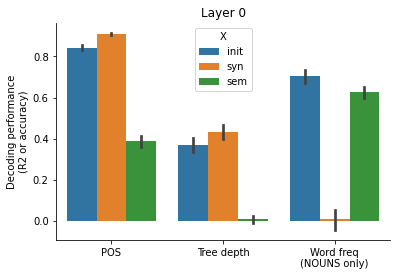

In [346]:
reform = {(ok, ik): v for ok, idict in r.items() for ik, v in idict.items()}
r_df = pd.DataFrame(reform)
r_df = pd.melt(r_df, var_name = ["Y", "X"], value_name="perf")
r_df
X_select = ["init", "syn", "sem"]
Y_select = ["tag", "depth", "freq"]

ax = plt.subplot()
sns.barplot("Y", "perf", hue="X", data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
plt.ylabel("Decoding performance\n(R2 or accuracy)")
plt.xlabel("")
ax.set_xticklabels([labels[i] for i in Y_select])
plt.title("Layer 0")

# Learn binder categories

In [ ]:
taggers, _ = get_taggers(file)

In [15]:
import pandas as pd

In [47]:
continuous = ['WC', 'N', 'Mean R', 'Vision', 'Bright', 'Dark', 'Color',
       'Pattern', 'Large', 'Small', 'Motion', 'Biomotion', 'Fast', 'Slow',
       'Shape', 'Complexity', 'Face', 'Body', 'Touch', 'Temperature',
       'Texture', 'Weight', 'Pain', 'Audition', 'Loud', 'Low', 'High', 'Sound',
       'Music', 'Speech', 'Taste', 'Smell', 'Head', 'UpperLimb', 'LowerLimb',
       'Practice', 'Landmark', 'Path', 'Scene', 'Near', 'Toward', 'Away',
       'Number', 'Time', 'Duration', 'Long', 'Short', 'Caused',
       'Consequential', 'Social', 'Human', 'Communication', 'Self',
       'Cognition', 'Benefit', 'Harm', 'Pleasant', 'Unpleasant', 'Happy',
       'Sad', 'Angry', 'Disgusted', 'Fearful', 'Surprised', 'Drive', 'Needs',
       'Attention', 'Arousal', 'LEN', 'FREQ', 'L10 FREQ',
       'Orth', 'Orth_F', 'N1_F', 'N2_F', 'N3_F', 'IMG',] 

categorial = 

In [19]:
binder = pd.read_csv(file)
wordembs = np.stack([nlp(w)[0].vector for w in binder.Word])

In [49]:
sem_emb = binder[continuous]
sem_emb = sem_emb.select_dtypes(include=[float, int]).astype(float)
sem_emb = sem_emb.fillna(0)

In [ ]:
sem_cat = binder[categorial]

In [73]:
scores = {}
for key in sem_emb.columns:
    model = make_pipeline(StandardScaler(), RidgeCV(np.logspace(-3, 5, 20)))
    scores[key] = cross_val_score(model, wordembs, sem_emb[key])

In [75]:
df = pd.DataFrame(scores).T
df["mean"] = df.mean(1)
df = df.query("mean>.1")
df

,0,1,2,3,4,mean
WC,0.664449,0.641425,0.686421,0.523327,0.648636,0.632852
Body,0.131633,0.120456,0.182780,0.047511,0.082817,0.113039
Path,0.082350,0.164537,0.092536,0.063452,0.135697,0.107714
Short,0.138689,0.109781,0.135853,0.086757,0.112955,0.116807
Human,0.168216,0.126075,0.256504,0.140970,0.166803,0.171714
Self,0.108444,0.011990,0.092942,0.231585,0.263592,0.141710
LEN,0.220333,0.126792,0.238516,0.267603,0.130563,0.196761
L10 FREQ,0.266332,0.195312,0.138396,0.198541,0.203058,0.200328
Orth,0.244504,0.022218,0.252280,0.285958,0.341091,0.229210


In [71]:
from sklearn.metrics import balanced_accuracy_score
scores = {}
for key in ['Type',
       'Super Category', 'Category', 'Kmeans28 Category']:
    Y = LabelEncoder().fit_transform(binder[key])
    model = make_pipeline(RidgeClassifierCV(np.logspace(-3, 5, 20)))
    scores[key] = cross_val_score(model, wordembs, Y, scoring=make_scorer(balanced_accuracy_score, adjusted=True))

/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/private/home/ccaucheteux/.conda/envs/torch_plot/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [72]:
df = pd.DataFrame(scores).T
df["mean"] = df.mean(1)
#df.query("mean>.1")
df

,0,1,2,3,4,mean
Type,0.541667,0.439394,0.583333,0.611385,0.547804,0.544716
Super Category,0.211538,0.176154,0.193846,0.201538,0.183582,0.193332
Category,0.078403,0.069841,0.060811,0.086486,0.076797,0.074468
Kmeans28 Category,0.082051,0.095532,0.094503,0.072972,0.081197,0.085251


In [82]:
taggers, _ = get_taggers(file)

/private/home/ccaucheteux/.conda/envs/hasson/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'Rectangle' object has no property 'colors'

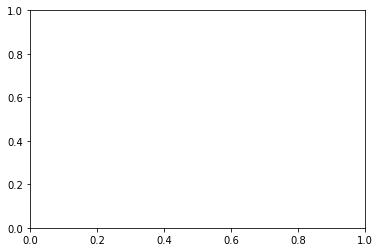

In [349]:
reform = {(ok, ik): v for ok, idict in r.items() for ik, v in idict.items()}
r_df = pd.DataFrame(reform)
r_df = pd.melt(r_df, var_name = ["Y", "X"], value_name="perf")
r_df
X_select = ["init", "syn", "sem"]
Y_select = ["tag", "depth", "freq"]

ax = plt.subplot()
sns.barplot("Y", "perf", hue="X", data=r_df.query("X in @X_select and Y in @Y_select"),
           colors=color)
sns.despine()
plt.ylabel("Decoding performance\n(R2 or accuracy)")
plt.xlabel("")
ax.set_xticklabels([labels[i] for i in Y_select])
plt.title("Layer 9")

/private/home/ccaucheteux/.conda/envs/hasson/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Layer 9')

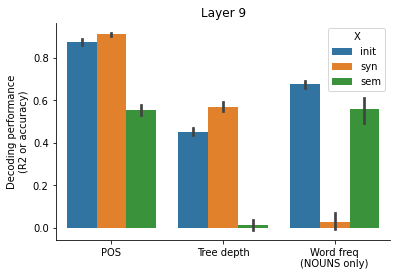

In [341]:
reform = {(ok, ik): v for ok, idict in r.items() for ik, v in idict.items()}
r_df = pd.DataFrame(reform)
r_df = pd.melt(r_df, var_name = ["Y", "X"], value_name="perf")
r_df
X_select = ["init", "syn", "sem"]
Y_select = ["tag", "depth", "freq"]

ax = plt.subplot()
sns.barplot("Y", "perf", hue="X", data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
plt.ylabel("Decoding performance\n(R2 or accuracy)")
plt.xlabel("")
ax.set_xticklabels([labels[i] for i in Y_select])
plt.title("Layer 9")

In [335]:
reform = {(ok, ik): v for ok, idict in r.items() for ik, v in idict.items()}
r_df = pd.DataFrame(reform)
r_df = pd.melt(r_df, var_name = ["Y", "X"], value_name="perf")
r_df
X_select = ["init", "syn", "sem"]
Y_select = ["tag", "depth", "freq"]

ax = plt.subplot()
sns.barplot("Y", "perf", hue="X", data=r_df.query("X in @X_select and Y in @Y_select"))
sns.despine()
plt.ylabel("Decoding performance\n(R2 or accuracy)")
plt.xlabel("")
ax.set_xticklabels([labels[i] for i in Y_select])

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [275]:
r

{'pos': {'init': array([0.88157895, 0.89692982, 0.88596491, 0.87912088, 0.87912088]),
  'syn': array([0.87280702, 0.89254386, 0.90350877, 0.88351648, 0.89450549]),
  'sem': array([0.66885965, 0.57017544, 0.60745614, 0.61538462, 0.63296703])},
 'tag': {'init': array([0.87061404, 0.89473684, 0.88596491, 0.87032967, 0.84615385]),
  'syn': array([0.91008772, 0.92324561, 0.9122807 , 0.8967033 , 0.9032967 ]),
  'sem': array([0.5745614 , 0.52850877, 0.51754386, 0.59120879, 0.54505495])},
 'wordemb': {'init': array([ 0.01950283, -0.06353646, -0.02344139, -0.0572328 , -0.01364677]),
  'syn': array([0.14916048, 0.10797988, 0.1214038 , 0.11069616, 0.09946313]),
  'sem': array([-0.18915753, -0.27987817, -0.22816873, -0.26060749, -0.23479473])},
 'depth': {'init': array([0.43766704, 0.47228711, 0.44593615, 0.47249365, 0.4293273 ]),
  'syn': array([0.58463006, 0.60819352, 0.53704935, 0.5617442 , 0.55549345]),
  'sem': array([-0.01968996, -0.01397689,  0.00327213,  0.0540185 ,  0.03173709])},
 'freq'

In [271]:
r

{'pos': {'init': array([0.88157895, 0.89692982, 0.88596491, 0.87912088, 0.87912088]),
  'syn': array([0.87280702, 0.89254386, 0.90350877, 0.88351648, 0.89450549]),
  'sem': array([0.66885965, 0.57017544, 0.60745614, 0.61538462, 0.63296703])},
 'tag': {'init': array([0.87061404, 0.89473684, 0.88596491, 0.87032967, 0.84615385]),
  'syn': array([0.91008772, 0.92324561, 0.9122807 , 0.8967033 , 0.9032967 ]),
  'sem': array([0.5745614 , 0.52850877, 0.51754386, 0.59120879, 0.54505495])},
 'wordemb': {'init': array([0.28354526, 0.23041185, 0.2617193 , 0.24682438, 0.2519766 ]),
  'syn': array([0.384588  , 0.35935663, 0.37477517, 0.37759199, 0.35227742]),
  'sem': array([-0.05314702, -0.14755464, -0.10295667, -0.09645856, -0.10386255])},
 'depth': {'init': array([0.43766704, 0.47228711, 0.44593615, 0.47249365, 0.4293273 ]),
  'syn': array([0.58463006, 0.60819352, 0.53704935, 0.5617442 , 0.55549345]),
  'sem': array([-0.01968996, -0.01397689,  0.00327213,  0.0540185 ,  0.03173709])},
 'freq': {'i

In [ ]:
from pandas import DataFrame, MultiIndex
from itertools import product

index = range(2), range(2), range(2)
value = range(2 * 2 * 2)
frame = DataFrame(value, columns=['value'],
                  index=MultiIndex.from_product(index)).drop((1, 0, 1))


In [306]:
r_df = pd.concat([pd.DataFrame(ri) for ri in r.values()])

#r_df = r_df.apply(lambda x: np.array(x).mean())

In [300]:
r_df[i] = np.array(i).mean()

,pos,tag,wordemb,depth,freq,wordemb_ro
init,"[0.881578947368421, 0.8969298245614035, 0.8859...","[0.8706140350877193, 0.8947368421052632, 0.885...","[0.3109126949065371, 0.250180651935292, 0.2907...","[0.4376670396359481, 0.4722871125706959, 0.445...","[0.6962117926871767, 0.6506204543124341, 0.666...","[-0.19898194268324496, -0.281563100614908, -0...."
syn,"[0.8728070175438597, 0.8925438596491229, 0.903...","[0.9100877192982456, 0.9232456140350878, 0.912...","[0.40984767104622183, 0.3801760813199384, 0.39...","[0.5846300563268598, 0.6081935168211057, 0.537...","[0.017579173354349997, 0.11061363992216033, 0....","[-0.09297673071098837, -0.11599185109307657, -..."
sem,"[0.668859649122807, 0.5701754385964912, 0.6074...","[0.5745614035087719, 0.5285087719298246, 0.517...","[-0.03845333917210354, -0.14146373215133148, -...","[-0.019689959985173422, -0.013976887417585848,...","[0.5148399770997172, 0.4544073603345433, 0.583...","[-0.2396003569890194, -0.33207621135822774, -0..."


In [266]:
np.where(X)

(array([  0,   0,   0, ..., 998, 998, 998]),
 array([  0,   1,   2, ..., 765, 766, 767]))

In [265]:
np.where(targets["pos"] == "NOUN")[0]

array([  0,   4,   6,  11,  18,  20,  22,  26,  29,  53,  61,  67,  70,
        72,  75,  77,  81,  84,  89,  93,  96,  98, 100, 104, 108, 110,
       112, 123, 126, 129, 133, 134, 136, 140, 142, 145, 148, 156, 159,
       162, 166, 168, 173, 176, 181, 184, 185, 192, 195, 197, 199, 204,
       214, 219, 229, 234, 236, 242, 245, 248, 255, 263, 265, 269, 272,
       275, 277, 279, 281, 297, 305, 310, 313, 327, 330, 332, 335, 339,
       342, 354, 357, 360, 364, 374, 375, 384, 385, 389, 402, 416, 418,
       423, 427, 433, 441, 443, 446, 449, 461, 464, 471, 472, 478, 479,
       485, 490, 493, 497, 499, 514, 518, 523, 531, 535, 537, 540, 544,
       546, 551, 553, 555, 557, 563, 566, 572, 574, 576, 578, 582, 585,
       588, 593, 596, 601, 606, 608, 610, 612, 615, 618, 620, 627, 631,
       634, 638, 649, 652, 659, 665, 667, 675, 686, 694, 702, 708, 713,
       717, 720, 723, 728, 734, 742, 748, 755, 771, 773, 775, 780, 782,
       786, 795, 797, 799, 801, 803, 808, 812, 817, 819, 823, 83

In [260]:
targets.keys()

dict_keys(['pos', 'tag', 'wordemb', 'depth'])

In [253]:
r

{'pos': {},
 'tag': {},
 'wordemb': {'init': array([0.20036189, 0.16351655, 0.22534017, 0.21789541, 0.08390521]),
  'syn': array([0.37392218, 0.37000383, 0.36436662, 0.35216147, 0.34968374]),
  'sem': array([-0.17579467, -0.25501672, -0.15167236, -0.16142396, -0.37256891])},
 'depth': {'init': array([0.47588444, 0.36525254, 0.40525871, 0.28899879, 0.48831807]),
  'syn': array([0.53450555, 0.53534021, 0.63483368, 0.60926949, 0.56355859]),
  'sem': array([-0.10196694, -0.0195932 , -0.04687684,  0.11247767,  0.07936425])}}

In [ ]:
from sklearn.model_selection import cross_val_predict

def predict_word_emb(tasks, cv=10):
    
    feats = {"X":[], "Xbar":[], "Y":[]}
    r = {}
    
    for task in tasks:
        
        print(task)
        
        # Features
        stim = get_stimulus(task, lower=False)
        stim["idx"] = range(len(stim))
        stim["task"] = task
        X = torch.load(emb_dir / task / "sum-gpt2-9.pth")
        Xbar = torch.load(emb_dir / task / "sum-gpt2-9.equiv-random-mean-10.pth")
        if len(X) != len(stim) or len(Xbar) != len(stim):
            print(task, len(X), len(stim), len(Xbar))
            continue
        words = stim.word_low.values
        
        # Validate
        valid = np.where([(type(w) is str and w != '<unk>' and len(w)>0) for w in words])[0]
        words = words[valid]
        Xbar = Xbar[valid]
        X = X[valid]
        
        # Extract vectors
        vectors = [nlp(str(i))[0].vector for i in words]
        vectors = np.stack(vectors)
        
        feats["X"].append(X)
        feats["Xbar"].append(Xbar)
        feats["Y"].append(vectors)
        
    feats = {k:np.concatenate(v, axis=0) for k,v in feats.items()}
    
    model = RidgeCV(np.logspace(-3, 3, 10))
    X_sem = cross_val_predict(model, feats["Xbar"], feats["X"], cv=cv)
    X_sem = feats["X"] - X_sem
    
    print("init model")
    r["init"] = cross_val_score(model, feats["X"], feats["Y"], cv=cv)
    r["syn"] = cross_val_score(model, feats["Xbar"], feats["Y"], cv=cv)
    r["sem"] = cross_val_score(model, feats["X"]-feats["Xbar"], feats["Y"], cv=cv)
    r["sem_ro"] = cross_val_score(model, X_sem, feats["Y"], cv=cv)
    
    return r

In [ ]:
# word embedding
# POS 
# tree depth



# Manning (post jogging)